# Start by loading Data

In [2]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 3)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('images/train')
test_files, test_targets = load_dataset('images/test')
print('There are %d training images.' % len(train_files))
print('There are %d training target.' %len(train_targets))
print('There are %d testing images.' % len(test_files))
print('There are %d testing target.' %len(test_targets))

There are 6002 training images.
There are 6002 training target.
There are 1500 testing images.
There are 1500 testing target.


## Defining functions to turn images into  4D tensors

In [1]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

Using TensorFlow backend.


## Load the dataset into tensors 

In [3]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [02:15<00:00, 11.05it/s]


## Model Architecture using Keras

In [5]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers import Dropout

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu',input_shape=(train_tensors.shape[1:]) ))
model.add(MaxPooling2D(pool_size=3))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(GlobalAveragePooling2D(data_format=None))
model.add(Dense(3, activation='softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 74, 74, 32)        2080      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 64)        8256      
__________

## Model Compiler

In [6]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Training the model 

In [7]:
from keras.callbacks import ModelCheckpoint  

epochs = 20

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 1/20


4080/6002 [===================>..........] - ETA: 13:46 - loss: 1.1283 - acc: 0.20 - ETA: 8:29 - loss: 1.1386 - acc: 0.3750 - ETA: 6:36 - loss: 1.1778 - acc: 0.333 - ETA: 5:37 - loss: 1.1506 - acc: 0.362 - ETA: 5:04 - loss: 1.1410 - acc: 0.370 - ETA: 4:40 - loss: 1.1346 - acc: 0.366 - ETA: 4:23 - loss: 1.1258 - acc: 0.371 - ETA: 4:11 - loss: 1.1283 - acc: 0.362 - ETA: 4:01 - loss: 1.1236 - acc: 0.388 - ETA: 3:52 - loss: 1.1208 - acc: 0.375 - ETA: 3:45 - loss: 1.1165 - acc: 0.377 - ETA: 3:40 - loss: 1.1222 - acc: 0.362 - ETA: 3:35 - loss: 1.1210 - acc: 0.353 - ETA: 3:31 - loss: 1.1198 - acc: 0.346 - ETA: 3:27 - loss: 1.1176 - acc: 0.353 - ETA: 3:24 - loss: 1.1163 - acc: 0.353 - ETA: 3:21 - loss: 1.1145 - acc: 0.355 - ETA: 3:19 - loss: 1.1144 - acc: 0.350 - ETA: 3:17 - loss: 1.1124 - acc: 0.352 - ETA: 3:14 - loss: 1.1128 - acc: 0.342 - ETA: 3:12 - loss: 1.1115 - acc: 0.347 - ETA: 3:10 - loss: 1.1100 - acc: 0.350 - ETA: 3:09 - loss: 1.1097 - acc: 0.352 - ETA: 3:07 - loss: 1.1082 - acc: 0.

C:\Users\Manar\Anaconda3\lib\site-packages\keras\callbacks.py:434: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


Epoch 2/20


4100/6002 [===================>..........] - ETA: 3:17 - loss: 0.6572 - acc: 0.750 - ETA: 3:02 - loss: 0.6740 - acc: 0.675 - ETA: 3:00 - loss: 0.7254 - acc: 0.683 - ETA: 2:54 - loss: 0.8229 - acc: 0.562 - ETA: 2:53 - loss: 0.7878 - acc: 0.590 - ETA: 2:52 - loss: 0.8342 - acc: 0.566 - ETA: 2:57 - loss: 0.8540 - acc: 0.542 - ETA: 2:56 - loss: 0.8242 - acc: 0.543 - ETA: 2:56 - loss: 0.8050 - acc: 0.550 - ETA: 2:57 - loss: 0.7989 - acc: 0.560 - ETA: 2:55 - loss: 0.7971 - acc: 0.568 - ETA: 2:54 - loss: 0.8127 - acc: 0.575 - ETA: 2:52 - loss: 0.8116 - acc: 0.576 - ETA: 2:51 - loss: 0.8001 - acc: 0.578 - ETA: 2:50 - loss: 0.8013 - acc: 0.590 - ETA: 2:48 - loss: 0.7851 - acc: 0.603 - ETA: 2:48 - loss: 0.7888 - acc: 0.608 - ETA: 2:46 - loss: 0.7862 - acc: 0.611 - ETA: 2:45 - loss: 0.7927 - acc: 0.597 - ETA: 2:44 - loss: 0.7950 - acc: 0.597 - ETA: 2:43 - loss: 0.7910 - acc: 0.602 - ETA: 2:43 - loss: 0.7938 - acc: 0.593 - ETA: 2:42 - loss: 0.8050 - acc: 0.587 - ETA: 2:41 - loss: 0.8102 - acc: 0.5

4100/6002 [===================>..........] - ETA: 2:40 - loss: 0.6968 - acc: 0.550 - ETA: 2:42 - loss: 0.8760 - acc: 0.550 - ETA: 2:40 - loss: 0.8018 - acc: 0.616 - ETA: 2:41 - loss: 0.7437 - acc: 0.612 - ETA: 2:40 - loss: 0.7350 - acc: 0.610 - ETA: 2:39 - loss: 0.6997 - acc: 0.616 - ETA: 2:38 - loss: 0.6801 - acc: 0.628 - ETA: 2:37 - loss: 0.6773 - acc: 0.643 - ETA: 2:37 - loss: 0.6559 - acc: 0.644 - ETA: 2:37 - loss: 0.6499 - acc: 0.650 - ETA: 2:36 - loss: 0.6500 - acc: 0.668 - ETA: 2:36 - loss: 0.6644 - acc: 0.666 - ETA: 2:35 - loss: 0.6603 - acc: 0.665 - ETA: 2:34 - loss: 0.6596 - acc: 0.660 - ETA: 2:34 - loss: 0.6452 - acc: 0.670 - ETA: 2:33 - loss: 0.6420 - acc: 0.675 - ETA: 2:33 - loss: 0.6388 - acc: 0.679 - ETA: 2:32 - loss: 0.6347 - acc: 0.688 - ETA: 2:31 - loss: 0.6412 - acc: 0.686 - ETA: 2:31 - loss: 0.6490 - acc: 0.680 - ETA: 2:30 - loss: 0.6859 - acc: 0.676 - ETA: 2:30 - loss: 0.6905 - acc: 0.668 - ETA: 2:29 - loss: 0.6997 - acc: 0.660 - ETA: 2:29 - loss: 0.7026 - acc: 0.6

6002/6002 [==============================] - ETA: 51s - loss: 0.6738 - acc: 0.65 - ETA: 51s - loss: 0.6766 - acc: 0.65 - ETA: 50s - loss: 0.6759 - acc: 0.65 - ETA: 50s - loss: 0.6748 - acc: 0.65 - ETA: 49s - loss: 0.6750 - acc: 0.65 - ETA: 49s - loss: 0.6747 - acc: 0.65 - ETA: 48s - loss: 0.6735 - acc: 0.65 - ETA: 48s - loss: 0.6729 - acc: 0.65 - ETA: 47s - loss: 0.6723 - acc: 0.65 - ETA: 46s - loss: 0.6720 - acc: 0.65 - ETA: 46s - loss: 0.6722 - acc: 0.65 - ETA: 45s - loss: 0.6729 - acc: 0.65 - ETA: 45s - loss: 0.6739 - acc: 0.65 - ETA: 44s - loss: 0.6735 - acc: 0.65 - ETA: 44s - loss: 0.6734 - acc: 0.65 - ETA: 43s - loss: 0.6738 - acc: 0.65 - ETA: 43s - loss: 0.6732 - acc: 0.65 - ETA: 42s - loss: 0.6724 - acc: 0.65 - ETA: 41s - loss: 0.6731 - acc: 0.65 - ETA: 41s - loss: 0.6726 - acc: 0.65 - ETA: 40s - loss: 0.6723 - acc: 0.65 - ETA: 40s - loss: 0.6744 - acc: 0.65 - ETA: 39s - loss: 0.6749 - acc: 0.65 - ETA: 39s - loss: 0.6751 - acc: 0.65 - ETA: 38s - loss: 0.6747 - acc: 0.65 - ETA: 

4100/6002 [===================>..........] - ETA: 2:40 - loss: 0.6663 - acc: 0.550 - ETA: 2:37 - loss: 0.8303 - acc: 0.500 - ETA: 2:38 - loss: 0.7347 - acc: 0.583 - ETA: 2:37 - loss: 0.6982 - acc: 0.600 - ETA: 2:37 - loss: 0.6600 - acc: 0.590 - ETA: 2:37 - loss: 0.6215 - acc: 0.625 - ETA: 2:36 - loss: 0.6368 - acc: 0.635 - ETA: 2:35 - loss: 0.6365 - acc: 0.650 - ETA: 2:36 - loss: 0.6221 - acc: 0.655 - ETA: 2:35 - loss: 0.6391 - acc: 0.635 - ETA: 2:34 - loss: 0.6300 - acc: 0.645 - ETA: 2:34 - loss: 0.6554 - acc: 0.645 - ETA: 2:34 - loss: 0.6579 - acc: 0.653 - ETA: 2:33 - loss: 0.6467 - acc: 0.664 - ETA: 2:32 - loss: 0.6701 - acc: 0.660 - ETA: 2:32 - loss: 0.6651 - acc: 0.662 - ETA: 2:31 - loss: 0.6529 - acc: 0.670 - ETA: 2:31 - loss: 0.6391 - acc: 0.677 - ETA: 2:30 - loss: 0.6387 - acc: 0.681 - ETA: 2:30 - loss: 0.6267 - acc: 0.690 - ETA: 2:29 - loss: 0.6380 - acc: 0.690 - ETA: 2:29 - loss: 0.6496 - acc: 0.679 - ETA: 2:28 - loss: 0.6545 - acc: 0.671 - ETA: 2:27 - loss: 0.6466 - acc: 0.6

4100/6002 [===================>..........] - ETA: 2:34 - loss: 1.8656 - acc: 0.550 - ETA: 2:36 - loss: 1.2503 - acc: 0.650 - ETA: 2:38 - loss: 0.9956 - acc: 0.683 - ETA: 2:39 - loss: 0.8728 - acc: 0.675 - ETA: 2:38 - loss: 0.7977 - acc: 0.690 - ETA: 2:37 - loss: 0.7712 - acc: 0.675 - ETA: 2:37 - loss: 0.7244 - acc: 0.692 - ETA: 2:36 - loss: 0.7182 - acc: 0.687 - ETA: 2:35 - loss: 0.7035 - acc: 0.694 - ETA: 2:35 - loss: 0.6840 - acc: 0.710 - ETA: 2:35 - loss: 0.6597 - acc: 0.722 - ETA: 2:35 - loss: 0.6564 - acc: 0.712 - ETA: 2:34 - loss: 0.6500 - acc: 0.700 - ETA: 2:33 - loss: 0.6490 - acc: 0.692 - ETA: 2:33 - loss: 0.6523 - acc: 0.680 - ETA: 2:32 - loss: 0.6370 - acc: 0.693 - ETA: 2:32 - loss: 0.6400 - acc: 0.688 - ETA: 2:31 - loss: 0.6353 - acc: 0.694 - ETA: 2:31 - loss: 0.6313 - acc: 0.697 - ETA: 2:30 - loss: 0.6223 - acc: 0.702 - ETA: 2:30 - loss: 0.6236 - acc: 0.700 - ETA: 2:29 - loss: 0.6149 - acc: 0.709 - ETA: 2:29 - loss: 0.6109 - acc: 0.710 - ETA: 2:28 - loss: 0.6131 - acc: 0.7

6002/6002 [==============================] - ETA: 52s - loss: 0.6217 - acc: 0.67 - ETA: 52s - loss: 0.6212 - acc: 0.67 - ETA: 51s - loss: 0.6207 - acc: 0.67 - ETA: 51s - loss: 0.6203 - acc: 0.67 - ETA: 50s - loss: 0.6198 - acc: 0.67 - ETA: 50s - loss: 0.6212 - acc: 0.67 - ETA: 49s - loss: 0.6239 - acc: 0.67 - ETA: 49s - loss: 0.6238 - acc: 0.67 - ETA: 48s - loss: 0.6232 - acc: 0.67 - ETA: 47s - loss: 0.6249 - acc: 0.67 - ETA: 47s - loss: 0.6256 - acc: 0.67 - ETA: 46s - loss: 0.6250 - acc: 0.67 - ETA: 46s - loss: 0.6248 - acc: 0.67 - ETA: 45s - loss: 0.6287 - acc: 0.67 - ETA: 45s - loss: 0.6281 - acc: 0.67 - ETA: 44s - loss: 0.6267 - acc: 0.67 - ETA: 43s - loss: 0.6265 - acc: 0.67 - ETA: 43s - loss: 0.6265 - acc: 0.67 - ETA: 42s - loss: 0.6267 - acc: 0.67 - ETA: 42s - loss: 0.6258 - acc: 0.67 - ETA: 41s - loss: 0.6252 - acc: 0.67 - ETA: 41s - loss: 0.6252 - acc: 0.67 - ETA: 40s - loss: 0.6247 - acc: 0.67 - ETA: 39s - loss: 0.6245 - acc: 0.67 - ETA: 39s - loss: 0.6239 - acc: 0.67 - ETA: 

4100/6002 [===================>..........] - ETA: 2:47 - loss: 0.5592 - acc: 0.600 - ETA: 2:48 - loss: 0.6811 - acc: 0.625 - ETA: 2:48 - loss: 0.7153 - acc: 0.633 - ETA: 2:47 - loss: 0.6861 - acc: 0.675 - ETA: 2:45 - loss: 0.6679 - acc: 0.700 - ETA: 2:44 - loss: 0.6726 - acc: 0.683 - ETA: 2:44 - loss: 0.6428 - acc: 0.692 - ETA: 2:43 - loss: 0.6214 - acc: 0.693 - ETA: 2:41 - loss: 0.5968 - acc: 0.700 - ETA: 2:40 - loss: 0.5958 - acc: 0.695 - ETA: 2:39 - loss: 0.6038 - acc: 0.686 - ETA: 2:39 - loss: 0.5951 - acc: 0.691 - ETA: 2:39 - loss: 0.5912 - acc: 0.692 - ETA: 2:39 - loss: 0.6001 - acc: 0.675 - ETA: 2:38 - loss: 0.6071 - acc: 0.676 - ETA: 2:37 - loss: 0.5952 - acc: 0.678 - ETA: 2:36 - loss: 0.5981 - acc: 0.673 - ETA: 2:36 - loss: 0.5933 - acc: 0.677 - ETA: 2:35 - loss: 0.5862 - acc: 0.686 - ETA: 2:34 - loss: 0.6008 - acc: 0.682 - ETA: 2:35 - loss: 0.5960 - acc: 0.690 - ETA: 2:34 - loss: 0.5926 - acc: 0.693 - ETA: 2:34 - loss: 0.5872 - acc: 0.695 - ETA: 2:34 - loss: 0.5865 - acc: 0.6

4100/6002 [===================>..........] - ETA: 2:36 - loss: 0.5812 - acc: 0.700 - ETA: 2:37 - loss: 0.5837 - acc: 0.675 - ETA: 2:38 - loss: 0.5931 - acc: 0.683 - ETA: 2:37 - loss: 0.6118 - acc: 0.650 - ETA: 2:38 - loss: 0.6018 - acc: 0.690 - ETA: 2:37 - loss: 0.6460 - acc: 0.666 - ETA: 2:37 - loss: 0.6521 - acc: 0.664 - ETA: 2:36 - loss: 0.6371 - acc: 0.681 - ETA: 2:37 - loss: 0.6231 - acc: 0.688 - ETA: 2:36 - loss: 0.6140 - acc: 0.705 - ETA: 2:35 - loss: 0.6098 - acc: 0.700 - ETA: 2:35 - loss: 0.6019 - acc: 0.704 - ETA: 2:34 - loss: 0.6089 - acc: 0.688 - ETA: 2:34 - loss: 0.5947 - acc: 0.703 - ETA: 2:34 - loss: 0.5900 - acc: 0.696 - ETA: 2:35 - loss: 0.6026 - acc: 0.693 - ETA: 2:35 - loss: 0.6212 - acc: 0.685 - ETA: 2:35 - loss: 0.6142 - acc: 0.691 - ETA: 2:35 - loss: 0.6197 - acc: 0.686 - ETA: 2:35 - loss: 0.6165 - acc: 0.692 - ETA: 2:34 - loss: 0.6219 - acc: 0.688 - ETA: 2:34 - loss: 0.6196 - acc: 0.681 - ETA: 2:35 - loss: 0.6159 - acc: 0.684 - ETA: 2:36 - loss: 0.6101 - acc: 0.6

6002/6002 [==============================] - ETA: 50s - loss: 0.5857 - acc: 0.70 - ETA: 50s - loss: 0.5853 - acc: 0.70 - ETA: 49s - loss: 0.5852 - acc: 0.70 - ETA: 49s - loss: 0.5844 - acc: 0.70 - ETA: 48s - loss: 0.5852 - acc: 0.70 - ETA: 47s - loss: 0.5869 - acc: 0.70 - ETA: 47s - loss: 0.5867 - acc: 0.70 - ETA: 46s - loss: 0.5862 - acc: 0.70 - ETA: 46s - loss: 0.5875 - acc: 0.70 - ETA: 45s - loss: 0.5874 - acc: 0.70 - ETA: 45s - loss: 0.5870 - acc: 0.70 - ETA: 44s - loss: 0.5865 - acc: 0.70 - ETA: 44s - loss: 0.5866 - acc: 0.70 - ETA: 43s - loss: 0.5872 - acc: 0.70 - ETA: 43s - loss: 0.5868 - acc: 0.70 - ETA: 42s - loss: 0.5861 - acc: 0.70 - ETA: 41s - loss: 0.5855 - acc: 0.70 - ETA: 41s - loss: 0.5857 - acc: 0.70 - ETA: 40s - loss: 0.5859 - acc: 0.70 - ETA: 40s - loss: 0.5858 - acc: 0.70 - ETA: 39s - loss: 0.5871 - acc: 0.70 - ETA: 39s - loss: 0.5871 - acc: 0.70 - ETA: 38s - loss: 0.5867 - acc: 0.70 - ETA: 38s - loss: 0.5865 - acc: 0.70 - ETA: 37s - loss: 0.5856 - acc: 0.70 - ETA: 

4100/6002 [===================>..........] - ETA: 2:35 - loss: 0.5066 - acc: 0.800 - ETA: 2:36 - loss: 0.5267 - acc: 0.725 - ETA: 2:36 - loss: 0.5942 - acc: 0.683 - ETA: 2:35 - loss: 0.6156 - acc: 0.650 - ETA: 2:36 - loss: 0.6558 - acc: 0.650 - ETA: 2:35 - loss: 0.6579 - acc: 0.650 - ETA: 2:35 - loss: 0.6533 - acc: 0.635 - ETA: 2:33 - loss: 0.6439 - acc: 0.643 - ETA: 2:33 - loss: 0.6477 - acc: 0.650 - ETA: 2:33 - loss: 0.6405 - acc: 0.650 - ETA: 2:32 - loss: 0.6283 - acc: 0.659 - ETA: 2:32 - loss: 0.6440 - acc: 0.650 - ETA: 2:31 - loss: 0.6297 - acc: 0.665 - ETA: 2:31 - loss: 0.6326 - acc: 0.664 - ETA: 2:30 - loss: 0.6137 - acc: 0.680 - ETA: 2:30 - loss: 0.6216 - acc: 0.662 - ETA: 2:29 - loss: 0.6213 - acc: 0.658 - ETA: 2:29 - loss: 0.6090 - acc: 0.672 - ETA: 2:28 - loss: 0.6004 - acc: 0.678 - ETA: 2:28 - loss: 0.6027 - acc: 0.680 - ETA: 2:27 - loss: 0.5997 - acc: 0.685 - ETA: 2:27 - loss: 0.5977 - acc: 0.686 - ETA: 2:28 - loss: 0.6077 - acc: 0.682 - ETA: 2:28 - loss: 0.6174 - acc: 0.6

4100/6002 [===================>..........] - ETA: 2:31 - loss: 0.6140 - acc: 0.750 - ETA: 2:34 - loss: 0.4739 - acc: 0.800 - ETA: 2:35 - loss: 0.4963 - acc: 0.850 - ETA: 2:34 - loss: 0.5520 - acc: 0.800 - ETA: 2:34 - loss: 0.5737 - acc: 0.790 - ETA: 2:35 - loss: 0.5560 - acc: 0.791 - ETA: 2:34 - loss: 0.5564 - acc: 0.778 - ETA: 2:33 - loss: 0.5419 - acc: 0.775 - ETA: 2:33 - loss: 0.5210 - acc: 0.777 - ETA: 2:33 - loss: 0.5383 - acc: 0.760 - ETA: 2:32 - loss: 0.5220 - acc: 0.763 - ETA: 2:32 - loss: 0.5110 - acc: 0.770 - ETA: 2:32 - loss: 0.4973 - acc: 0.773 - ETA: 2:31 - loss: 0.4961 - acc: 0.778 - ETA: 2:31 - loss: 0.4939 - acc: 0.780 - ETA: 2:30 - loss: 0.5129 - acc: 0.771 - ETA: 2:30 - loss: 0.5235 - acc: 0.761 - ETA: 2:29 - loss: 0.5275 - acc: 0.755 - ETA: 2:29 - loss: 0.5360 - acc: 0.750 - ETA: 2:28 - loss: 0.5328 - acc: 0.750 - ETA: 2:28 - loss: 0.5293 - acc: 0.750 - ETA: 2:27 - loss: 0.5332 - acc: 0.750 - ETA: 2:27 - loss: 0.5307 - acc: 0.752 - ETA: 2:26 - loss: 0.5338 - acc: 0.7

6002/6002 [==============================] - ETA: 51s - loss: 0.5416 - acc: 0.72 - ETA: 50s - loss: 0.5419 - acc: 0.72 - ETA: 49s - loss: 0.5438 - acc: 0.72 - ETA: 49s - loss: 0.5429 - acc: 0.72 - ETA: 48s - loss: 0.5438 - acc: 0.72 - ETA: 48s - loss: 0.5439 - acc: 0.72 - ETA: 47s - loss: 0.5433 - acc: 0.72 - ETA: 47s - loss: 0.5434 - acc: 0.72 - ETA: 46s - loss: 0.5439 - acc: 0.72 - ETA: 46s - loss: 0.5434 - acc: 0.72 - ETA: 45s - loss: 0.5431 - acc: 0.72 - ETA: 45s - loss: 0.5421 - acc: 0.72 - ETA: 44s - loss: 0.5418 - acc: 0.72 - ETA: 43s - loss: 0.5419 - acc: 0.72 - ETA: 43s - loss: 0.5421 - acc: 0.72 - ETA: 42s - loss: 0.5417 - acc: 0.72 - ETA: 42s - loss: 0.5413 - acc: 0.72 - ETA: 41s - loss: 0.5416 - acc: 0.72 - ETA: 41s - loss: 0.5408 - acc: 0.72 - ETA: 40s - loss: 0.5411 - acc: 0.72 - ETA: 40s - loss: 0.5408 - acc: 0.72 - ETA: 39s - loss: 0.5403 - acc: 0.72 - ETA: 39s - loss: 0.5410 - acc: 0.72 - ETA: 38s - loss: 0.5419 - acc: 0.72 - ETA: 37s - loss: 0.5416 - acc: 0.72 - ETA: 

4100/6002 [===================>..........] - ETA: 2:35 - loss: 0.6701 - acc: 0.650 - ETA: 2:37 - loss: 0.6443 - acc: 0.675 - ETA: 2:37 - loss: 0.5327 - acc: 0.733 - ETA: 2:36 - loss: 0.5234 - acc: 0.737 - ETA: 2:36 - loss: 0.5243 - acc: 0.760 - ETA: 2:35 - loss: 0.5227 - acc: 0.750 - ETA: 2:35 - loss: 0.5222 - acc: 0.742 - ETA: 2:38 - loss: 0.5105 - acc: 0.743 - ETA: 2:38 - loss: 0.5448 - acc: 0.744 - ETA: 2:37 - loss: 0.5552 - acc: 0.740 - ETA: 2:37 - loss: 0.5438 - acc: 0.745 - ETA: 2:37 - loss: 0.5568 - acc: 0.741 - ETA: 2:36 - loss: 0.5751 - acc: 0.730 - ETA: 2:36 - loss: 0.5809 - acc: 0.710 - ETA: 2:35 - loss: 0.5760 - acc: 0.713 - ETA: 2:35 - loss: 0.5844 - acc: 0.703 - ETA: 2:35 - loss: 0.5852 - acc: 0.702 - ETA: 2:34 - loss: 0.5771 - acc: 0.713 - ETA: 2:33 - loss: 0.5839 - acc: 0.710 - ETA: 2:33 - loss: 0.5801 - acc: 0.715 - ETA: 2:32 - loss: 0.5766 - acc: 0.711 - ETA: 2:31 - loss: 0.5811 - acc: 0.709 - ETA: 2:31 - loss: 0.5699 - acc: 0.715 - ETA: 2:30 - loss: 0.5671 - acc: 0.7

4100/6002 [===================>..........] - ETA: 2:36 - loss: 0.5740 - acc: 0.650 - ETA: 2:37 - loss: 0.5460 - acc: 0.725 - ETA: 2:36 - loss: 0.4776 - acc: 0.733 - ETA: 2:37 - loss: 0.4581 - acc: 0.750 - ETA: 2:36 - loss: 0.4408 - acc: 0.790 - ETA: 2:36 - loss: 0.4673 - acc: 0.766 - ETA: 2:36 - loss: 0.4778 - acc: 0.764 - ETA: 2:35 - loss: 0.4801 - acc: 0.750 - ETA: 2:34 - loss: 0.4921 - acc: 0.744 - ETA: 2:34 - loss: 0.5144 - acc: 0.730 - ETA: 2:33 - loss: 0.5139 - acc: 0.731 - ETA: 2:33 - loss: 0.5200 - acc: 0.725 - ETA: 2:33 - loss: 0.5099 - acc: 0.730 - ETA: 2:32 - loss: 0.4946 - acc: 0.746 - ETA: 2:31 - loss: 0.4777 - acc: 0.756 - ETA: 2:31 - loss: 0.4853 - acc: 0.746 - ETA: 2:30 - loss: 0.4861 - acc: 0.747 - ETA: 2:30 - loss: 0.4907 - acc: 0.750 - ETA: 2:29 - loss: 0.4936 - acc: 0.747 - ETA: 2:29 - loss: 0.4979 - acc: 0.752 - ETA: 2:28 - loss: 0.5129 - acc: 0.745 - ETA: 2:28 - loss: 0.5065 - acc: 0.750 - ETA: 2:27 - loss: 0.5068 - acc: 0.747 - ETA: 2:27 - loss: 0.5050 - acc: 0.7

6002/6002 [==============================] - ETA: 50s - loss: 0.5311 - acc: 0.73 - ETA: 50s - loss: 0.5299 - acc: 0.73 - ETA: 49s - loss: 0.5312 - acc: 0.73 - ETA: 49s - loss: 0.5310 - acc: 0.73 - ETA: 48s - loss: 0.5315 - acc: 0.73 - ETA: 48s - loss: 0.5319 - acc: 0.73 - ETA: 47s - loss: 0.5315 - acc: 0.73 - ETA: 47s - loss: 0.5321 - acc: 0.73 - ETA: 46s - loss: 0.5314 - acc: 0.73 - ETA: 46s - loss: 0.5319 - acc: 0.73 - ETA: 45s - loss: 0.5316 - acc: 0.73 - ETA: 44s - loss: 0.5313 - acc: 0.73 - ETA: 44s - loss: 0.5311 - acc: 0.73 - ETA: 43s - loss: 0.5310 - acc: 0.73 - ETA: 43s - loss: 0.5306 - acc: 0.73 - ETA: 42s - loss: 0.5303 - acc: 0.73 - ETA: 42s - loss: 0.5305 - acc: 0.73 - ETA: 41s - loss: 0.5312 - acc: 0.73 - ETA: 41s - loss: 0.5307 - acc: 0.73 - ETA: 40s - loss: 0.5299 - acc: 0.73 - ETA: 40s - loss: 0.5298 - acc: 0.73 - ETA: 39s - loss: 0.5295 - acc: 0.73 - ETA: 38s - loss: 0.5293 - acc: 0.73 - ETA: 38s - loss: 0.5287 - acc: 0.73 - ETA: 37s - loss: 0.5285 - acc: 0.73 - ETA: 

4100/6002 [===================>..........] - ETA: 2:37 - loss: 1.2081 - acc: 0.550 - ETA: 2:41 - loss: 0.7660 - acc: 0.700 - ETA: 2:40 - loss: 0.7493 - acc: 0.616 - ETA: 2:39 - loss: 0.6678 - acc: 0.675 - ETA: 2:39 - loss: 0.6350 - acc: 0.690 - ETA: 2:38 - loss: 0.6171 - acc: 0.716 - ETA: 2:37 - loss: 0.5961 - acc: 0.721 - ETA: 2:37 - loss: 0.5661 - acc: 0.737 - ETA: 2:36 - loss: 0.5525 - acc: 0.744 - ETA: 2:37 - loss: 0.5438 - acc: 0.750 - ETA: 2:36 - loss: 0.5482 - acc: 0.750 - ETA: 2:35 - loss: 0.5516 - acc: 0.750 - ETA: 2:35 - loss: 0.5929 - acc: 0.750 - ETA: 2:34 - loss: 0.5990 - acc: 0.739 - ETA: 2:34 - loss: 0.5877 - acc: 0.740 - ETA: 2:33 - loss: 0.5873 - acc: 0.734 - ETA: 2:33 - loss: 0.5853 - acc: 0.729 - ETA: 2:33 - loss: 0.5812 - acc: 0.733 - ETA: 2:33 - loss: 0.5722 - acc: 0.736 - ETA: 2:32 - loss: 0.5618 - acc: 0.742 - ETA: 2:32 - loss: 0.5657 - acc: 0.733 - ETA: 2:32 - loss: 0.5710 - acc: 0.731 - ETA: 2:31 - loss: 0.5724 - acc: 0.734 - ETA: 2:30 - loss: 0.5727 - acc: 0.7

4100/6002 [===================>..........] - ETA: 2:37 - loss: 0.7309 - acc: 0.500 - ETA: 2:37 - loss: 0.6431 - acc: 0.575 - ETA: 2:37 - loss: 0.5766 - acc: 0.633 - ETA: 2:37 - loss: 0.5181 - acc: 0.687 - ETA: 2:36 - loss: 0.5090 - acc: 0.690 - ETA: 2:36 - loss: 0.4703 - acc: 0.733 - ETA: 2:36 - loss: 0.4878 - acc: 0.714 - ETA: 2:35 - loss: 0.4896 - acc: 0.712 - ETA: 2:35 - loss: 0.4746 - acc: 0.727 - ETA: 2:34 - loss: 0.4792 - acc: 0.725 - ETA: 2:34 - loss: 0.4706 - acc: 0.731 - ETA: 2:32 - loss: 0.4716 - acc: 0.737 - ETA: 2:32 - loss: 0.4821 - acc: 0.738 - ETA: 2:31 - loss: 0.4890 - acc: 0.732 - ETA: 2:31 - loss: 0.5112 - acc: 0.716 - ETA: 2:30 - loss: 0.5084 - acc: 0.721 - ETA: 2:30 - loss: 0.4986 - acc: 0.726 - ETA: 2:29 - loss: 0.4920 - acc: 0.730 - ETA: 2:29 - loss: 0.4974 - acc: 0.726 - ETA: 2:28 - loss: 0.4811 - acc: 0.740 - ETA: 2:28 - loss: 0.4773 - acc: 0.745 - ETA: 2:27 - loss: 0.4780 - acc: 0.745 - ETA: 2:27 - loss: 0.4846 - acc: 0.745 - ETA: 2:27 - loss: 0.4843 - acc: 0.7

6002/6002 [==============================] - ETA: 51s - loss: 0.5068 - acc: 0.75 - ETA: 50s - loss: 0.5082 - acc: 0.75 - ETA: 49s - loss: 0.5083 - acc: 0.75 - ETA: 49s - loss: 0.5075 - acc: 0.75 - ETA: 48s - loss: 0.5081 - acc: 0.75 - ETA: 48s - loss: 0.5095 - acc: 0.75 - ETA: 47s - loss: 0.5090 - acc: 0.75 - ETA: 47s - loss: 0.5089 - acc: 0.75 - ETA: 46s - loss: 0.5088 - acc: 0.75 - ETA: 46s - loss: 0.5086 - acc: 0.75 - ETA: 45s - loss: 0.5099 - acc: 0.75 - ETA: 45s - loss: 0.5099 - acc: 0.75 - ETA: 44s - loss: 0.5101 - acc: 0.75 - ETA: 43s - loss: 0.5095 - acc: 0.75 - ETA: 43s - loss: 0.5101 - acc: 0.75 - ETA: 42s - loss: 0.5104 - acc: 0.75 - ETA: 42s - loss: 0.5106 - acc: 0.75 - ETA: 41s - loss: 0.5117 - acc: 0.75 - ETA: 41s - loss: 0.5116 - acc: 0.75 - ETA: 40s - loss: 0.5115 - acc: 0.75 - ETA: 40s - loss: 0.5116 - acc: 0.75 - ETA: 39s - loss: 0.5135 - acc: 0.75 - ETA: 39s - loss: 0.5137 - acc: 0.75 - ETA: 38s - loss: 0.5136 - acc: 0.75 - ETA: 37s - loss: 0.5135 - acc: 0.75 - ETA: 

4100/6002 [===================>..........] - ETA: 2:35 - loss: 0.7377 - acc: 0.800 - ETA: 2:36 - loss: 0.6260 - acc: 0.775 - ETA: 2:36 - loss: 0.6421 - acc: 0.700 - ETA: 2:37 - loss: 0.6104 - acc: 0.712 - ETA: 2:42 - loss: 0.5529 - acc: 0.760 - ETA: 2:42 - loss: 0.5353 - acc: 0.750 - ETA: 2:41 - loss: 0.5107 - acc: 0.757 - ETA: 2:41 - loss: 0.5142 - acc: 0.743 - ETA: 2:41 - loss: 0.5139 - acc: 0.727 - ETA: 2:40 - loss: 0.4956 - acc: 0.750 - ETA: 2:39 - loss: 0.5057 - acc: 0.750 - ETA: 2:38 - loss: 0.5189 - acc: 0.745 - ETA: 2:38 - loss: 0.5398 - acc: 0.730 - ETA: 2:37 - loss: 0.5565 - acc: 0.725 - ETA: 2:36 - loss: 0.5454 - acc: 0.736 - ETA: 2:36 - loss: 0.5680 - acc: 0.728 - ETA: 2:35 - loss: 0.5756 - acc: 0.720 - ETA: 2:35 - loss: 0.5667 - acc: 0.727 - ETA: 2:34 - loss: 0.5562 - acc: 0.734 - ETA: 2:34 - loss: 0.5483 - acc: 0.737 - ETA: 2:33 - loss: 0.5425 - acc: 0.742 - ETA: 2:33 - loss: 0.5481 - acc: 0.738 - ETA: 2:32 - loss: 0.5409 - acc: 0.745 - ETA: 2:31 - loss: 0.5347 - acc: 0.7

4100/6002 [===================>..........] - ETA: 2:42 - loss: 0.4438 - acc: 0.700 - ETA: 2:41 - loss: 0.3761 - acc: 0.800 - ETA: 2:42 - loss: 0.3545 - acc: 0.816 - ETA: 2:41 - loss: 0.3858 - acc: 0.812 - ETA: 2:40 - loss: 0.4120 - acc: 0.810 - ETA: 2:38 - loss: 0.4202 - acc: 0.800 - ETA: 2:37 - loss: 0.4371 - acc: 0.778 - ETA: 2:37 - loss: 0.4382 - acc: 0.775 - ETA: 2:36 - loss: 0.4357 - acc: 0.772 - ETA: 2:35 - loss: 0.4411 - acc: 0.765 - ETA: 2:34 - loss: 0.4429 - acc: 0.759 - ETA: 2:34 - loss: 0.4481 - acc: 0.754 - ETA: 2:34 - loss: 0.4414 - acc: 0.761 - ETA: 2:33 - loss: 0.4366 - acc: 0.767 - ETA: 2:32 - loss: 0.4254 - acc: 0.780 - ETA: 2:32 - loss: 0.4215 - acc: 0.784 - ETA: 2:31 - loss: 0.4191 - acc: 0.779 - ETA: 2:31 - loss: 0.4239 - acc: 0.775 - ETA: 2:30 - loss: 0.4550 - acc: 0.763 - ETA: 2:30 - loss: 0.4773 - acc: 0.755 - ETA: 2:29 - loss: 0.4705 - acc: 0.754 - ETA: 2:28 - loss: 0.4749 - acc: 0.752 - ETA: 2:28 - loss: 0.4819 - acc: 0.754 - ETA: 2:28 - loss: 0.4732 - acc: 0.7

6002/6002 [==============================] - ETA: 51s - loss: 0.4879 - acc: 0.76 - ETA: 50s - loss: 0.4889 - acc: 0.76 - ETA: 50s - loss: 0.4888 - acc: 0.76 - ETA: 49s - loss: 0.4884 - acc: 0.76 - ETA: 49s - loss: 0.4873 - acc: 0.76 - ETA: 48s - loss: 0.4873 - acc: 0.76 - ETA: 47s - loss: 0.4883 - acc: 0.76 - ETA: 47s - loss: 0.4884 - acc: 0.76 - ETA: 46s - loss: 0.4899 - acc: 0.76 - ETA: 46s - loss: 0.4904 - acc: 0.76 - ETA: 45s - loss: 0.4902 - acc: 0.76 - ETA: 45s - loss: 0.4896 - acc: 0.76 - ETA: 44s - loss: 0.4896 - acc: 0.76 - ETA: 44s - loss: 0.4899 - acc: 0.76 - ETA: 43s - loss: 0.4894 - acc: 0.76 - ETA: 43s - loss: 0.4889 - acc: 0.76 - ETA: 42s - loss: 0.4888 - acc: 0.76 - ETA: 41s - loss: 0.4888 - acc: 0.76 - ETA: 41s - loss: 0.4896 - acc: 0.76 - ETA: 40s - loss: 0.4890 - acc: 0.76 - ETA: 40s - loss: 0.4892 - acc: 0.76 - ETA: 39s - loss: 0.4892 - acc: 0.76 - ETA: 39s - loss: 0.4889 - acc: 0.76 - ETA: 38s - loss: 0.4892 - acc: 0.76 - ETA: 38s - loss: 0.4892 - acc: 0.76 - ETA: 

4100/6002 [===================>..........] - ETA: 2:53 - loss: 0.3406 - acc: 0.800 - ETA: 2:48 - loss: 0.3854 - acc: 0.800 - ETA: 2:47 - loss: 0.4154 - acc: 0.800 - ETA: 2:48 - loss: 0.3989 - acc: 0.825 - ETA: 2:46 - loss: 0.4118 - acc: 0.810 - ETA: 2:45 - loss: 0.4125 - acc: 0.808 - ETA: 2:44 - loss: 0.3983 - acc: 0.828 - ETA: 2:42 - loss: 0.4385 - acc: 0.800 - ETA: 2:41 - loss: 0.4528 - acc: 0.788 - ETA: 2:40 - loss: 0.4527 - acc: 0.785 - ETA: 2:39 - loss: 0.4477 - acc: 0.781 - ETA: 2:38 - loss: 0.4507 - acc: 0.783 - ETA: 2:38 - loss: 0.4388 - acc: 0.792 - ETA: 2:37 - loss: 0.4335 - acc: 0.800 - ETA: 2:36 - loss: 0.4343 - acc: 0.800 - ETA: 2:35 - loss: 0.4205 - acc: 0.809 - ETA: 2:34 - loss: 0.4245 - acc: 0.800 - ETA: 2:33 - loss: 0.4550 - acc: 0.791 - ETA: 2:33 - loss: 0.4544 - acc: 0.792 - ETA: 2:33 - loss: 0.4595 - acc: 0.795 - ETA: 2:32 - loss: 0.4546 - acc: 0.800 - ETA: 2:32 - loss: 0.4545 - acc: 0.797 - ETA: 2:31 - loss: 0.4493 - acc: 0.800 - ETA: 2:31 - loss: 0.4739 - acc: 0.7

4100/6002 [===================>..........] - ETA: 2:39 - loss: 0.3054 - acc: 0.900 - ETA: 2:39 - loss: 0.4467 - acc: 0.800 - ETA: 2:40 - loss: 0.4126 - acc: 0.833 - ETA: 2:39 - loss: 0.4192 - acc: 0.837 - ETA: 2:37 - loss: 0.4420 - acc: 0.820 - ETA: 2:37 - loss: 0.4289 - acc: 0.825 - ETA: 2:37 - loss: 0.4198 - acc: 0.821 - ETA: 2:36 - loss: 0.4195 - acc: 0.825 - ETA: 2:36 - loss: 0.4126 - acc: 0.838 - ETA: 2:35 - loss: 0.4327 - acc: 0.820 - ETA: 2:34 - loss: 0.4358 - acc: 0.809 - ETA: 2:34 - loss: 0.4354 - acc: 0.804 - ETA: 2:34 - loss: 0.4396 - acc: 0.807 - ETA: 2:33 - loss: 0.4355 - acc: 0.807 - ETA: 2:33 - loss: 0.4285 - acc: 0.803 - ETA: 2:32 - loss: 0.4250 - acc: 0.803 - ETA: 2:32 - loss: 0.4301 - acc: 0.802 - ETA: 2:31 - loss: 0.4637 - acc: 0.791 - ETA: 2:30 - loss: 0.4629 - acc: 0.792 - ETA: 2:30 - loss: 0.4729 - acc: 0.785 - ETA: 2:29 - loss: 0.4725 - acc: 0.783 - ETA: 2:29 - loss: 0.4742 - acc: 0.779 - ETA: 2:28 - loss: 0.4709 - acc: 0.778 - ETA: 2:27 - loss: 0.4840 - acc: 0.7

6002/6002 [==============================] - ETA: 51s - loss: 0.4873 - acc: 0.76 - ETA: 51s - loss: 0.4864 - acc: 0.76 - ETA: 50s - loss: 0.4853 - acc: 0.76 - ETA: 50s - loss: 0.4853 - acc: 0.76 - ETA: 49s - loss: 0.4850 - acc: 0.76 - ETA: 48s - loss: 0.4849 - acc: 0.76 - ETA: 48s - loss: 0.4841 - acc: 0.76 - ETA: 47s - loss: 0.4837 - acc: 0.76 - ETA: 47s - loss: 0.4831 - acc: 0.76 - ETA: 46s - loss: 0.4833 - acc: 0.76 - ETA: 46s - loss: 0.4836 - acc: 0.76 - ETA: 45s - loss: 0.4831 - acc: 0.76 - ETA: 45s - loss: 0.4821 - acc: 0.77 - ETA: 44s - loss: 0.4810 - acc: 0.77 - ETA: 43s - loss: 0.4816 - acc: 0.77 - ETA: 43s - loss: 0.4819 - acc: 0.77 - ETA: 42s - loss: 0.4814 - acc: 0.77 - ETA: 42s - loss: 0.4834 - acc: 0.76 - ETA: 41s - loss: 0.4828 - acc: 0.77 - ETA: 41s - loss: 0.4835 - acc: 0.76 - ETA: 40s - loss: 0.4828 - acc: 0.76 - ETA: 40s - loss: 0.4833 - acc: 0.76 - ETA: 39s - loss: 0.4828 - acc: 0.77 - ETA: 39s - loss: 0.4821 - acc: 0.77 - ETA: 38s - loss: 0.4816 - acc: 0.77 - ETA: 

4100/6002 [===================>..........] - ETA: 2:52 - loss: 0.3207 - acc: 0.900 - ETA: 2:45 - loss: 0.3183 - acc: 0.825 - ETA: 2:44 - loss: 0.3240 - acc: 0.850 - ETA: 2:42 - loss: 0.4621 - acc: 0.825 - ETA: 2:41 - loss: 0.4682 - acc: 0.830 - ETA: 2:40 - loss: 0.4551 - acc: 0.833 - ETA: 2:39 - loss: 0.4893 - acc: 0.800 - ETA: 2:38 - loss: 0.4879 - acc: 0.793 - ETA: 2:39 - loss: 0.4800 - acc: 0.788 - ETA: 2:39 - loss: 0.4715 - acc: 0.790 - ETA: 2:41 - loss: 0.5025 - acc: 0.772 - ETA: 2:39 - loss: 0.5093 - acc: 0.758 - ETA: 2:39 - loss: 0.5331 - acc: 0.742 - ETA: 2:38 - loss: 0.5239 - acc: 0.742 - ETA: 2:37 - loss: 0.5179 - acc: 0.743 - ETA: 2:36 - loss: 0.5116 - acc: 0.743 - ETA: 2:35 - loss: 0.5156 - acc: 0.738 - ETA: 2:34 - loss: 0.5068 - acc: 0.744 - ETA: 2:34 - loss: 0.5017 - acc: 0.744 - ETA: 2:33 - loss: 0.5082 - acc: 0.737 - ETA: 2:32 - loss: 0.4966 - acc: 0.745 - ETA: 2:32 - loss: 0.4959 - acc: 0.750 - ETA: 2:31 - loss: 0.4958 - acc: 0.750 - ETA: 2:30 - loss: 0.4895 - acc: 0.7

4100/6002 [===================>..........] - ETA: 2:54 - loss: 0.6196 - acc: 0.650 - ETA: 2:52 - loss: 0.4957 - acc: 0.750 - ETA: 2:49 - loss: 0.4432 - acc: 0.783 - ETA: 2:45 - loss: 0.4241 - acc: 0.787 - ETA: 2:44 - loss: 0.4766 - acc: 0.780 - ETA: 2:43 - loss: 0.4967 - acc: 0.766 - ETA: 2:42 - loss: 0.5156 - acc: 0.735 - ETA: 2:41 - loss: 0.5442 - acc: 0.718 - ETA: 2:40 - loss: 0.5213 - acc: 0.733 - ETA: 2:40 - loss: 0.5471 - acc: 0.725 - ETA: 2:39 - loss: 0.5350 - acc: 0.731 - ETA: 2:38 - loss: 0.5377 - acc: 0.729 - ETA: 2:37 - loss: 0.5486 - acc: 0.711 - ETA: 2:38 - loss: 0.5375 - acc: 0.717 - ETA: 2:37 - loss: 0.5352 - acc: 0.720 - ETA: 2:36 - loss: 0.5221 - acc: 0.728 - ETA: 2:36 - loss: 0.5113 - acc: 0.735 - ETA: 2:35 - loss: 0.5089 - acc: 0.730 - ETA: 2:34 - loss: 0.5081 - acc: 0.734 - ETA: 2:34 - loss: 0.5060 - acc: 0.732 - ETA: 2:33 - loss: 0.5081 - acc: 0.731 - ETA: 2:32 - loss: 0.5038 - acc: 0.731 - ETA: 2:32 - loss: 0.5007 - acc: 0.734 - ETA: 2:31 - loss: 0.5009 - acc: 0.7

6002/6002 [==============================] - ETA: 51s - loss: 0.4738 - acc: 0.77 - ETA: 51s - loss: 0.4736 - acc: 0.77 - ETA: 50s - loss: 0.4734 - acc: 0.77 - ETA: 49s - loss: 0.4728 - acc: 0.77 - ETA: 49s - loss: 0.4727 - acc: 0.77 - ETA: 48s - loss: 0.4719 - acc: 0.77 - ETA: 48s - loss: 0.4721 - acc: 0.77 - ETA: 47s - loss: 0.4724 - acc: 0.77 - ETA: 47s - loss: 0.4721 - acc: 0.77 - ETA: 46s - loss: 0.4720 - acc: 0.77 - ETA: 46s - loss: 0.4721 - acc: 0.77 - ETA: 45s - loss: 0.4710 - acc: 0.77 - ETA: 45s - loss: 0.4704 - acc: 0.77 - ETA: 44s - loss: 0.4700 - acc: 0.77 - ETA: 44s - loss: 0.4699 - acc: 0.77 - ETA: 43s - loss: 0.4699 - acc: 0.77 - ETA: 43s - loss: 0.4686 - acc: 0.77 - ETA: 42s - loss: 0.4680 - acc: 0.77 - ETA: 41s - loss: 0.4674 - acc: 0.77 - ETA: 41s - loss: 0.4671 - acc: 0.77 - ETA: 40s - loss: 0.4663 - acc: 0.77 - ETA: 40s - loss: 0.4664 - acc: 0.77 - ETA: 39s - loss: 0.4665 - acc: 0.77 - ETA: 39s - loss: 0.4657 - acc: 0.77 - ETA: 38s - loss: 0.4676 - acc: 0.77 - ETA: 

4100/6002 [===================>..........] - ETA: 2:35 - loss: 0.3872 - acc: 0.800 - ETA: 2:51 - loss: 0.4871 - acc: 0.725 - ETA: 2:54 - loss: 0.4798 - acc: 0.716 - ETA: 2:52 - loss: 0.4572 - acc: 0.737 - ETA: 2:54 - loss: 0.4485 - acc: 0.730 - ETA: 2:54 - loss: 0.4868 - acc: 0.700 - ETA: 2:54 - loss: 0.4864 - acc: 0.714 - ETA: 2:53 - loss: 0.4769 - acc: 0.731 - ETA: 2:53 - loss: 0.4598 - acc: 0.744 - ETA: 2:53 - loss: 0.4398 - acc: 0.760 - ETA: 2:53 - loss: 0.4405 - acc: 0.763 - ETA: 2:51 - loss: 0.4445 - acc: 0.766 - ETA: 2:50 - loss: 0.4326 - acc: 0.780 - ETA: 2:48 - loss: 0.4388 - acc: 0.771 - ETA: 2:47 - loss: 0.4423 - acc: 0.766 - ETA: 2:48 - loss: 0.4458 - acc: 0.768 - ETA: 2:47 - loss: 0.4416 - acc: 0.773 - ETA: 2:47 - loss: 0.4515 - acc: 0.769 - ETA: 2:46 - loss: 0.4511 - acc: 0.771 - ETA: 2:44 - loss: 0.4502 - acc: 0.772 - ETA: 2:43 - loss: 0.4437 - acc: 0.776 - ETA: 2:42 - loss: 0.4492 - acc: 0.770 - ETA: 2:41 - loss: 0.4481 - acc: 0.769 - ETA: 2:41 - loss: 0.4518 - acc: 0.7

## Testing the Test Dataset and calculating its accuracy 

In [9]:
prediction = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]
test_accuracy = 100*np.sum(np.array(prediction)==np.argmax(test_targets, axis=1))/len(prediction)

In [11]:
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 76.4667%


## Show some examples 

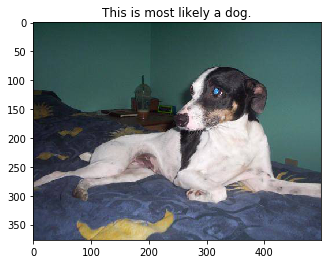

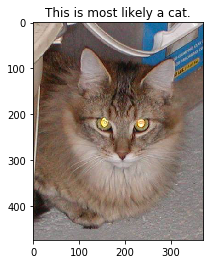

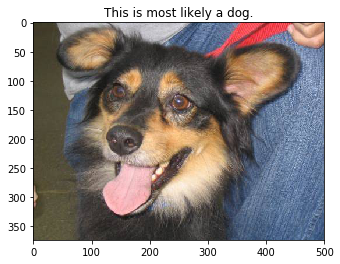

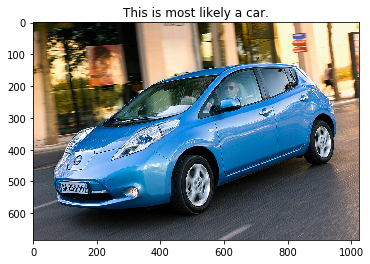

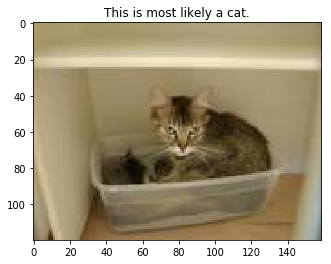

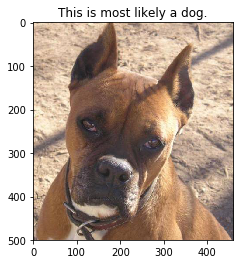

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

names = [item[13:-1] for item in sorted(glob("images/train/*/"))]

def detector_keras(img_path):
    img = mpimg.imread(img_path)
    _ = plt.imshow(img)
    tensor = path_to_tensor(img_path).astype('float32')/255
    index = np.argmax(model.predict(tensor))
    plt.title("This is most likely a %s." % names[index]);
    plt.show()
    return

detector_keras('images/test\dog\dog.405.jpg')
detector_keras('images/test\cat\cat.68.jpg')
detector_keras('images/test\dog\dog.78.jpg')
detector_keras('images/test\car\car.00050.jpg')
detector_keras('images/test\cat\cat.101.jpg')
detector_keras('images/test\dog\dog.4551.jpg')